## Explain Any Models with the SHAP Values

* Please read [Explain Any Models with the SHAP Values](https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a)

In [1]:
import shap
shap.initjs()
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/winequality-red.csv') # ,sep=';')

In [3]:
df.shape

(1599, 12)

In [4]:
df.columns
df['quality'] = df['quality'].astype(int)

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


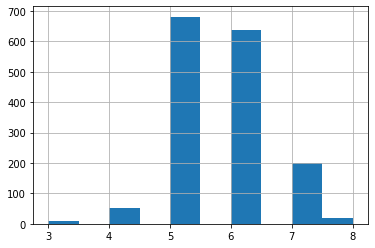

In [6]:
df['quality'].hist()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

Y = df['quality']
X =  df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1)

In [9]:
X_test.shape

(160, 11)

In [10]:
X_test.mean()

fixed acidity            8.239375
volatile acidity         0.513281
citric acid              0.269812
residual sugar           2.557500
chlorides                0.086425
free sulfur dioxide     14.981250
total sulfur dioxide    42.506250
density                  0.996653
pH                       3.318500
sulphates                0.652063
alcohol                 10.481250
dtype: float64

In [11]:
X_test.iloc[10,:]

fixed acidity            8.60000
volatile acidity         0.52000
citric acid              0.38000
residual sugar           1.50000
chlorides                0.09600
free sulfur dioxide      5.00000
total sulfur dioxide    18.00000
density                  0.99666
pH                       3.20000
sulphates                0.52000
alcohol                  9.40000
Name: 1099, dtype: float64

### Random Forest

[0.03279718 0.16212684 0.01720764 0.03965912 0.03606932 0.01562006
 0.07127238 0.03328242 0.03568697 0.16817872 0.38809936]


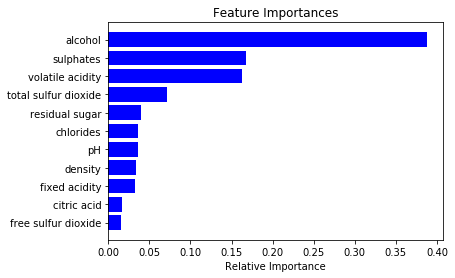

In [12]:
rf = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
rf.fit(X_train, Y_train)  
print(rf.feature_importances_)

importances = rf.feature_importances_
indices = np.argsort(importances)

features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [13]:
X_test[0:1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1109,10.8,0.47,0.43,2.1,0.171,27.0,66.0,0.9982,3.17,0.76,10.8


In [18]:
import shap
shap.initjs()
rf_explainer = shap.KernelExplainer(rf.predict, X_test)
rf_shap_values = rf_explainer.shap_values(X_test)

Using 160 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


ImportError: FloatProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [15]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4
...,...,...,...,...,...,...,...,...,...,...,...
31,6.9,0.685,0.00,2.50,0.105,22.0,37.0,0.99660,3.46,0.57,10.6
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0
223,8.6,0.645,0.25,2.00,0.083,8.0,28.0,0.99815,3.28,0.60,10.0
1121,6.6,0.500,0.00,1.80,0.062,21.0,28.0,0.99352,3.44,0.55,12.3


In [16]:
rf_explainer(X_test)

TypeError: 'KernelExplainer' object is not callable

In [17]:
rf_shap_values

NameError: name 'rf_shap_values' is not defined

In [36]:
rf_explainer.expected_value

5.634390395656761

In [41]:
# plot the SHAP values for the 10th observation 
shap.force_plot(rf_explainer.expected_value, rf_shap_values[10,:], X_test.iloc[10,:]) #, link="logit")

In [25]:
shap.force_plot(rf_explainer.expected_value, rf_shap_values, X_test)

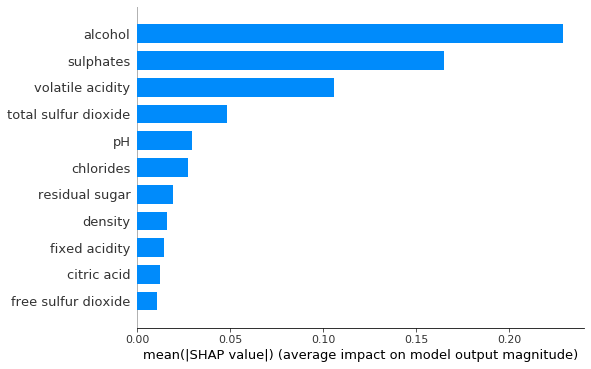

In [26]:
shap.summary_plot(rf_shap_values, X_test, plot_type="bar")

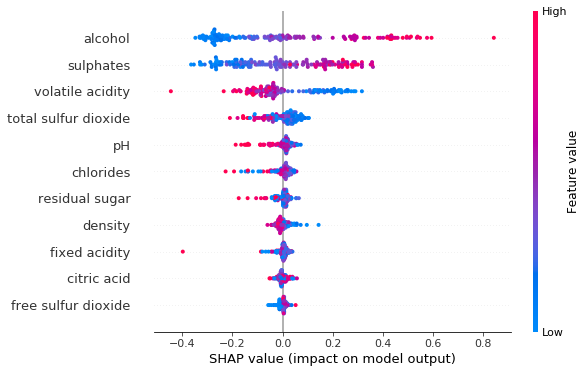

In [27]:
shap.summary_plot(rf_shap_values, X_test)

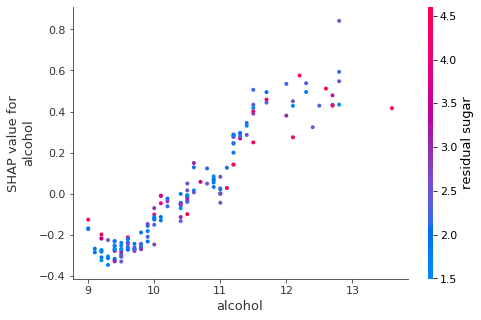

In [28]:
shap.dependence_plot("alcohol", rf_shap_values, X_test)

### GBM

In [29]:
from sklearn import ensemble
n_estimators = 500
gbm = ensemble.GradientBoostingClassifier(
            n_estimators=n_estimators,
            random_state=0)
gbm.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [30]:
gbm_explainer = shap.KernelExplainer(gbm.predict, X_test)
gbm_shap_values = gbm_explainer.shap_values(X_test)

Using 160 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.


/Users/chriskuo/anaconda3/envs/AD/lib/python3.7/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/Users/chriskuo/anaconda3/envs/AD/lib/python3.7/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/Users/chriskuo/anaconda3/envs/AD/lib/python3.7/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the n

/Users/chriskuo/anaconda3/envs/AD/lib/python3.7/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


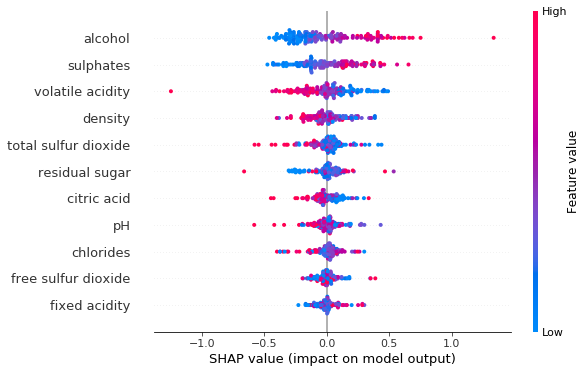

In [31]:
shap.summary_plot(gbm_shap_values, X_test)

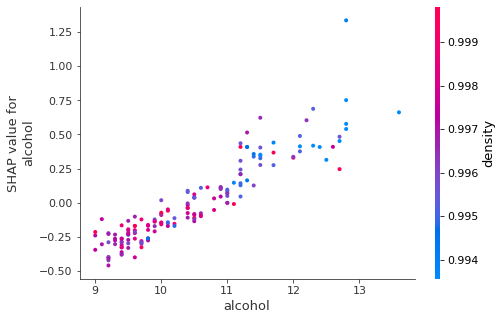

In [32]:
shap.dependence_plot("alcohol", gbm_shap_values, X_test)

In [42]:
# plot the SHAP values for the 10th observation 
shap.force_plot(gbm_explainer.expected_value,gbm_shap_values[10,:], X_test.iloc[10,:]) #, link="logit")

In [33]:
shap.force_plot(gbm_explainer.expected_value, gbm_shap_values, X_test)

In [ ]:
shap.force_plot(gbm_explainer.expected_value, gbm_shap_values, X_test)


# plot the SHAP values for the Setosa output of the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:], link="logit")

### XGB

In [ ]:
from xgboost import XGBClassifier
n_estimators = 500
xgb = ensemble.XGBClassifier(
            n_estimators=n_estimators,
            random_state=0)
xgb.fit(X_train, Y_train)

In [ ]:
xgb_explainer = shap.KernelExplainer(rf.predict, X_test)
xgb_shap_values = xgb_explainer.shap_values(X_test)

In [ ]:
shap.dependence_plot("alcohol", xgb_shap_values, X_test)

In [ ]:
shap.force_plot(gbm_explainer.expected_value, gbm_shap_values, X_test)

### KNN

In [16]:
from sklearn import neighbors
n_neighbors = 15
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')

In [18]:
knn_explainer = shap.KernelExplainer(knn.predict, X_test)
knn_shap_values = knn_explainer.shap_values(X_test)

Using 160 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.


/Users/chriskuo/anaconda3/envs/AD/lib/python3.7/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/Users/chriskuo/anaconda3/envs/AD/lib/python3.7/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/Users/chriskuo/anaconda3/envs/AD/lib/python3.7/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the n

/Users/chriskuo/anaconda3/envs/AD/lib/python3.7/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


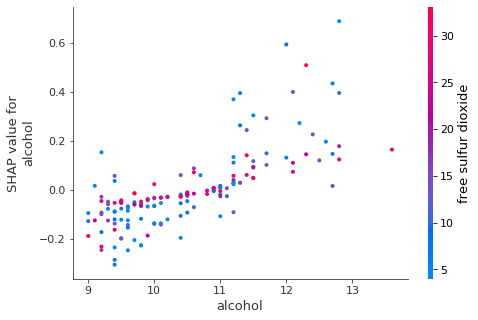

In [19]:
shap.dependence_plot("alcohol", knn_shap_values, X_test)

In [43]:
# plot the SHAP values for the 10th observation 
shap.force_plot(knn_explainer.expected_value,knn_shap_values[10,:], X_test.iloc[10,:]) 

In [20]:
shap.force_plot(knn_explainer.expected_value, knn_shap_values, X_test)

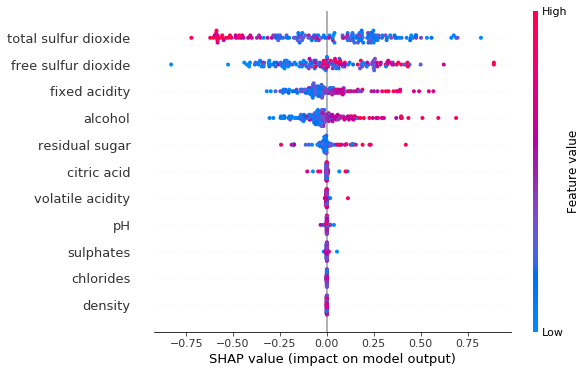

In [21]:
shap.summary_plot(knn_shap_values, X_test)

### SVM

In [11]:
from sklearn import svm
svm = svm.SVC(gamma='scale', decision_function_shape='ovo')
svm.fit(X_train, Y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
svm_explainer = shap.KernelExplainer(svm.predict, X_test)
svm_shap_values = svm_explainer.shap_values(X_test)

Using 160 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.


/Users/chriskuo/anaconda3/envs/AD/lib/python3.7/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/Users/chriskuo/anaconda3/envs/AD/lib/python3.7/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/Users/chriskuo/anaconda3/envs/AD/lib/python3.7/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the n

/Users/chriskuo/anaconda3/envs/AD/lib/python3.7/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


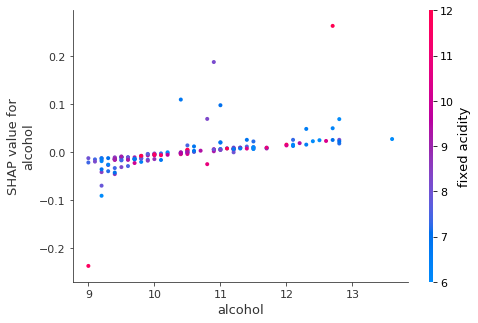

In [13]:
shap.dependence_plot("alcohol", svm_shap_values, X_test)

In [44]:
# plot the SHAP values for the 10th observation 
shap.force_plot(svm_explainer.expected_value,svm_shap_values[10,:], X_test.iloc[10,:]) 

In [14]:
shap.force_plot(svm_explainer.expected_value, svm_shap_values, X_test)

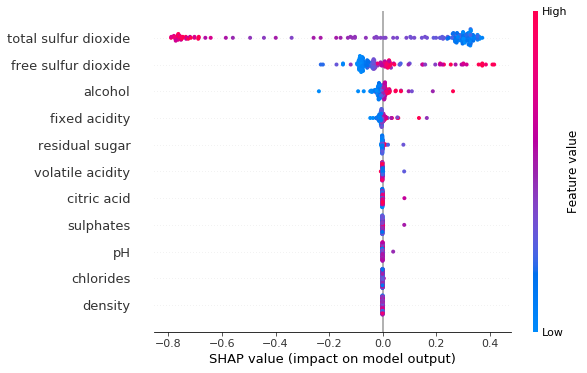

In [15]:
shap.summary_plot(svm_shap_values, X_test)

### H2O

In [27]:
import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,14 mins 45 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.5
H2O cluster version age:,4 months and 17 days !!!
H2O cluster name:,H2O_from_python_chriskuo_dfwh4q
H2O cluster total nodes:,1
H2O cluster free memory:,1.770 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [53]:
X_train, X_test = train_test_split(df, test_size = 0.1)

In [54]:
X_train_hex = h2o.H2OFrame(X_train)
X_test_hex = h2o.H2OFrame(X_test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [55]:
X_names =  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [56]:
# Define model
h2o_rf = H2ORandomForestEstimator(ntrees=200, max_depth=20, nfolds=10)

# Train model
h2o_rf.train(x=X_names, y='quality', training_frame=X_train_hex)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [57]:
X_test = X_test_hex.drop('quality').as_data_frame()

In [73]:
class H2OProbWrapper:
    def __init__(self, h2o_model, feature_names):
        self.h2o_model = h2o_model
        self.feature_names = feature_names

    def predict_binary_prob(self, X):
        if isinstance(X, pd.Series):
            X = X.values.reshape(1,-1)
        self.dataframe= pd.DataFrame(X, columns=self.feature_names)
        self.predictions = self.h2o_model.predict(h2o.H2OFrame(self.dataframe)).as_data_frame().values
        return self.predictions.astype('float64')[:,-1] #probability of True class

In [76]:
h2o_wrapper = H2OProbWrapper(h2o_rf,X_names)

In [78]:
h2o_rf_explainer = shap.KernelExplainer(h2o_wrapper.predict_binary_prob, X_test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


In [79]:
h2o_rf_explainer = shap.KernelExplainer(h2o_wrapper.predict_binary_prob, X_test)
h2o_rf_shap_values = h2o_rf_explainer.shap_values(X_test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


Parse progress: |█████████████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


/Users/chriskuo/anaconda3/envs/AD/lib/python3.7/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


Parse progress: |█████████████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
Parse progress: |███████████

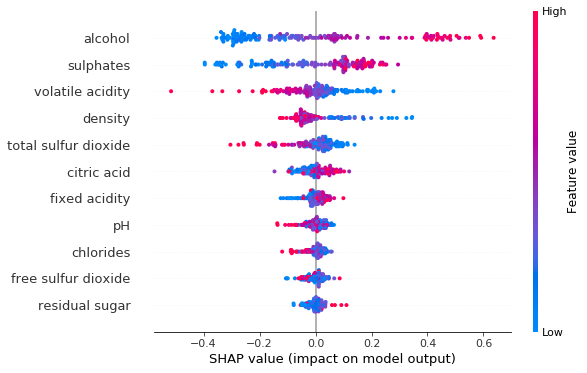

In [80]:
shap.summary_plot(h2o_rf_shap_values, X_test)

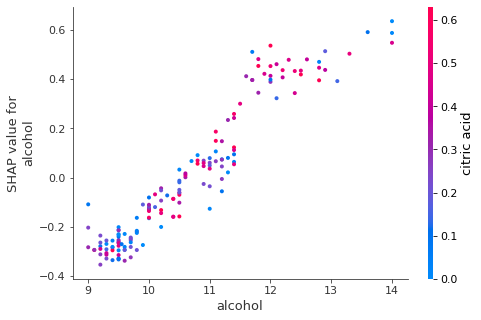

In [81]:
shap.dependence_plot("alcohol", h2o_rf_shap_values, X_test)

In [82]:
# plot the SHAP values for the 10th observation 
shap.force_plot(h2o_rf_explainer.expected_value,h2o_rf_shap_values[10,:], X_test.iloc[10,:]) #, link="logit")

In [83]:
shap.force_plot(h2o_rf_explainer.expected_value, h2o_rf_shap_values, X_test)